# Лабораторная работа №2 — Теория случайных процессов
**Вариант 6.** Ковариационная функция
\(K(\tau) = D e^{-\alpha|\tau|}(1 + \alpha|\tau|),\; D=2,\; \alpha=0.5\).

Спектральная плотность
\(S(\omega)=\dfrac{D}{\pi}\dfrac{2\alpha^3}{(\alpha^2+\omega^2)^2}\).

**Задачи:** моделирование стационарного гауссовского процесса двумя методами:
1. Метод скользящего среднего;
2. Спектральный метод.

In [3]:
import numpy as np
from scipy.optimize import least_squares
import matplotlib.pyplot as plt

## Задание 1. Моделирование методом скользящего среднего
Смоделировать 10 реализации случайного процесса ξ(t) с заданной ковариационной функцией Kξ (τ) и нулевым математическим ожиданием, используя метод скользящего среднего.

In [4]:
# Параметры согласно варианту
D = 2.0
alpha = 0.5

def K_theoretical(tau):
    """Теоретическая ковариационная функция K(tau)."""
    return D * np.exp(-alpha * np.abs(tau)) * (1 + alpha * np.abs(tau))

In [5]:
Tmax = 100.0               
n = 401                    
dt = 2 * Tmax / (n - 1)
t = np.linspace(-Tmax, Tmax, n)

In [9]:
t.shape

(401,)

In [10]:
K_vals = K_theoretical(t)

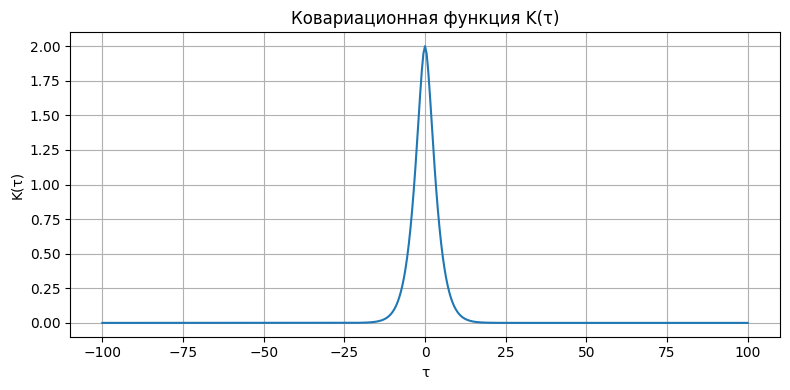

In [ ]:
plt.figure(figsize=(8,4))
plt.plot(t, K_vals)
plt.title('Ковариационная функция K(τ)')
plt.xlabel('τ')
plt.ylabel('K(τ)')
plt.grid(True)
plt.tight_layout()
plt.show()

In [13]:
N = 51  # число коэффициентов фильтра
lags = np.arange(0, N) * dt
K_lags = K_theoretical(lags)

def residuals(c, K_target):
    """Остатки для системы нелинейных уравнений (формула 6)."""
    Nloc = len(c)
    res = np.zeros(Nloc)
    for m in range(Nloc):
        res[m] = np.dot(c[:Nloc - m], c[m:]) - K_target[m]
    return res

In [ ]:
c0 = np.sqrt(K_lags[0]) / np.sqrt(N) * np.ones(N)

# Решаем систему методом наименьших квадратов
sol = least_squares(residuals, c0, args=(K_lags,), xtol=1e-12, ftol=1e-12)
c_est = sol.x

print("Оптимизация завершена:", sol.message)
print("Первые 10 коэффициентов системы нелинейных уравнений:", np.round(c_est[:10], 4))

Оптимизация завершена: `gtol` termination condition is satisfied.
Первые 10 коэффициентов системы нелинейных уравнений: [ 0.0051  0.0129  0.0214  0.0219  0.0047 -0.0261 -0.0552 -0.0592 -0.0202
  0.0471]


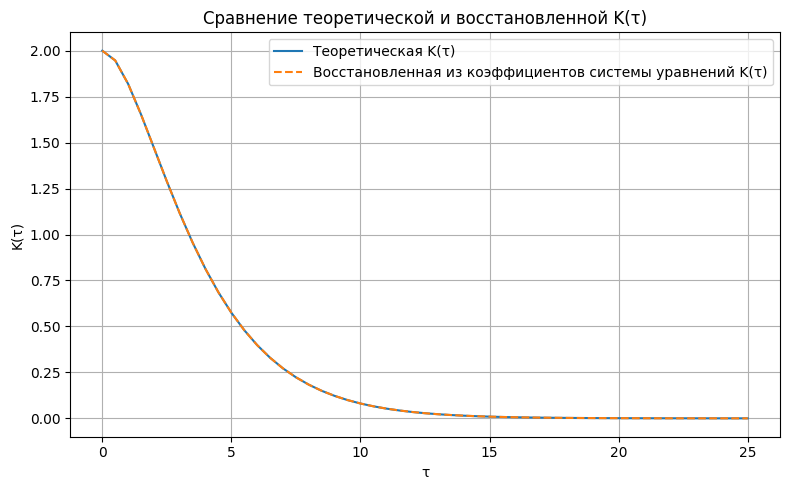

In [17]:
# Восстановим ковариационную функцию из найденных коэффициентов
K_reconstructed = np.array([
    np.dot(c_est[:N - m], c_est[m:]) for m in range(N)
])

# Сравнение с теоретической K(τ)
plt.figure(figsize=(8,5))
plt.plot(lags, K_lags, label='Теоретическая K(τ)')
plt.plot(lags, K_reconstructed, '--', label='Восстановленная из коэффициентов системы уравнений K(τ)')
plt.title('Сравнение теоретической и восстановленной K(τ)')
plt.xlabel('τ')
plt.ylabel('K(τ)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [19]:
# моделирование реализаций методом скользящего среднего
np.random.seed(42)

n_realizations = 10
white_size = N + n
realizations = np.zeros((n_realizations, n))

for r in range(n_realizations):
    # Генерируем белый шум
    white = np.random.normal(0, 1, white_size)
    x = np.convolve(white, c_est, mode='valid')[:n]
    realizations[r] = x

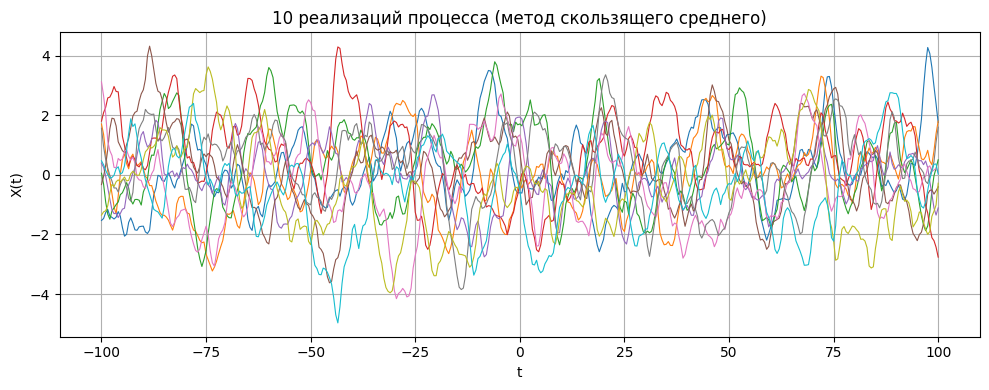

In [25]:
# визуализируем 10 реализаций процесса
plt.figure(figsize=(10,4))
for r in range(n_realizations):
    plt.plot(np.linspace(-Tmax, Tmax, n), realizations[r], linewidth=0.8)
plt.title('10 реализаций процесса (метод скользящего среднего)')
plt.xlabel('t')
plt.ylabel('X(t)')
plt.grid(True)
plt.tight_layout()
plt.show()

In [26]:
print("Среднее по всем реализациям =", realizations.mean())

Среднее по всем реализациям = 0.05690980740992281


## Вывод
- По графику видно, что теоретическая ковариационная функция почти идентична реконструированной на основании коэффициентов системы нелинейных уравнений;
- Мат. ожидание случайного процесса, полученного методом скользящего среднего, равняется 0.06, что близко к теоретическому нулевому мат. ожиданию.

## Задание 2. Моделирование методом канонического разложения*
Смоделировать 10 реализаций стационарного гауссовского случайного процесса с заданной ковариационной функцией Kξ (τ) и нулевым математическим ожиданием.

In [28]:
def S_theoretical(omega):
    """Аналитическая спектральная плотность S(omega)."""
    return (D / np.pi) * (2 * alpha**3) / (alpha**2 + omega**2)**2

print("K(0) =", K_theoretical(0.0))
print("S(0) =", S_theoretical(0.0))

K(0) = 2.0
S(0) = 2.5464790894703255


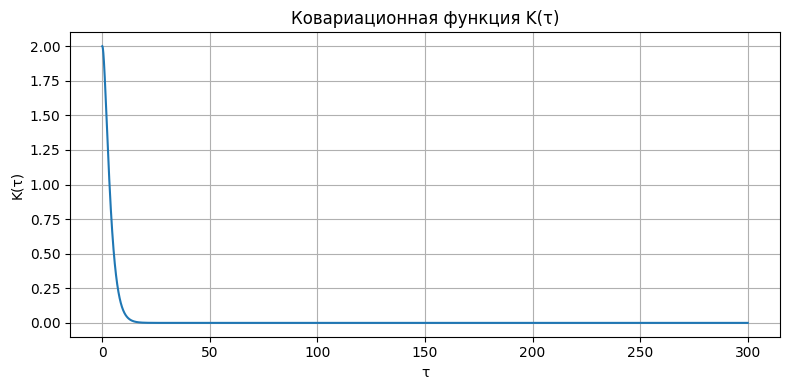

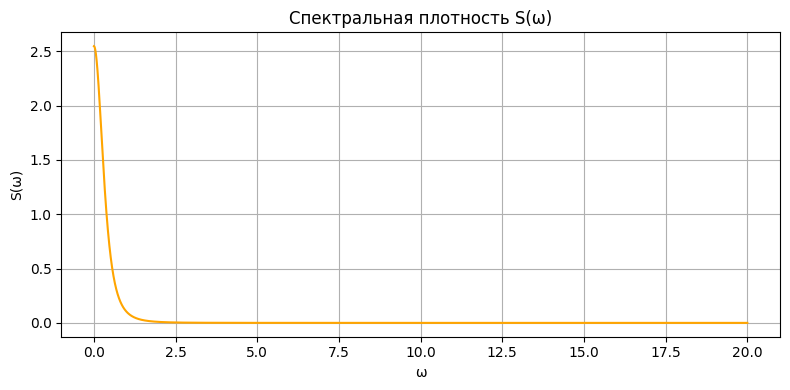

In [30]:
tau_grid = np.linspace(0, 300, 20001)  # диапазон τ для графика
K_grid = K_theoretical(tau_grid)

plt.figure(figsize=(8,4))
plt.plot(tau_grid, K_grid, label='K(τ)')
plt.title('Ковариационная функция K(τ)')
plt.xlabel('τ')
plt.ylabel('K(τ)')
plt.grid(True)
plt.tight_layout()
plt.show()

omega_grid = np.linspace(0, 20, 10001)
S_grid = S_theoretical(omega_grid)

plt.figure(figsize=(8,4))
plt.plot(omega_grid, S_grid, label='S(ω)', color='orange')
plt.title('Спектральная плотность S(ω)')
plt.xlabel('ω')
plt.ylabel('S(ω)')
plt.grid(True)
plt.tight_layout()
plt.show()


In [ ]:
T_p = 13      
omega_B = 2.5  

M = int(np.floor(omega_B * T_p / (2 * np.pi)))
omega_k_pos = np.arange(1, M + 1) * np.pi * 2 / T_p

n_time = 401
t = np.linspace(-T_p, T_p, n_time)
dt = t[1] - t[0]

print(f"T_p = {T_p}, ω_B = {omega_B}")
print(f"ω = {np.pi * 2 / T_p:.4f}, M (нечетное) = {M}")
print(f"Временной шаг dt = {dt:.4f}, число точек = {n_time}")

T_p = 13, ω_B = 2.5
ω = 0.4833, M (нечётное) = 5
Временной шаг dt = 0.0650, число точек = 401


In [48]:
Delta_omega = np.pi / T_p
S_k = S_theoretical(omega_k_pos)
Dk = S_k * Delta_omega  
print(f"{M} дисперсий гармоник:", np.round(Dk, 6))


5 дисперсий гармоник: [0.164458 0.027418 0.00695  0.002419 0.001037]


In [49]:
np.random.seed(0)
n_realizations = 10

sigma_coeff = np.sqrt(Dk / 2.0)   # стандартные отклонения для u_k и v_k

realizations = np.zeros((n_realizations, n_time))

for r in range(n_realizations):
    u_k = np.random.normal(loc=0.0, scale=sigma_coeff, size=len(omega_k_pos))
    v_k = np.random.normal(loc=0.0, scale=sigma_coeff, size=len(omega_k_pos))
    X = np.zeros_like(t)
    for k_idx, w in enumerate(omega_k_pos):
        X += u_k[k_idx] * np.cos(w * t) + v_k[k_idx] * np.sin(w * t)
    realizations[r, :] = X

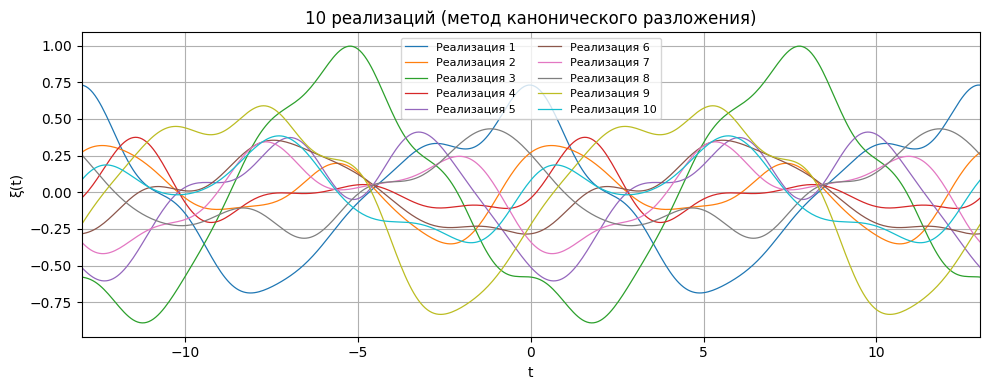

In [50]:
plt.figure(figsize=(10,4))
for r in range(n_realizations):
    plt.plot(t, realizations[r], linewidth=0.9, label=f'Реализация {r+1}')
plt.xlim(-T_p, T_p)
plt.xlabel('t')
plt.ylabel('ξ(t)')
plt.title('10 реализаций (метод канонического разложения)')
plt.grid(True)
plt.legend(ncol=2, fontsize=8)
plt.tight_layout()
plt.show()

In [ ]:
variance_total = K_theoretical(0.0)
variance_accounted = 2 * np.sum(Dk)
method_error_abs = variance_total - variance_accounted
method_error_rel = method_error_abs / variance_total
print("Дисперсия (теоретическая) =", variance_total)
print("Дисперсия, учтенная гармониками ≈", variance_accounted)
print("Абсолютная погрешность =", method_error_abs)
print("Относительная погрешность =", method_error_rel)

Дисперсия (теоретическая) = 2.0
Дисперсия, учтённая гармониками ≈ 0.404562673250183
Абсолютная погрешность = 1.595437326749817
Относительная погрешность = 0.7977186633749085


Выборочное среднее (в среднем по времени) = -0.0002


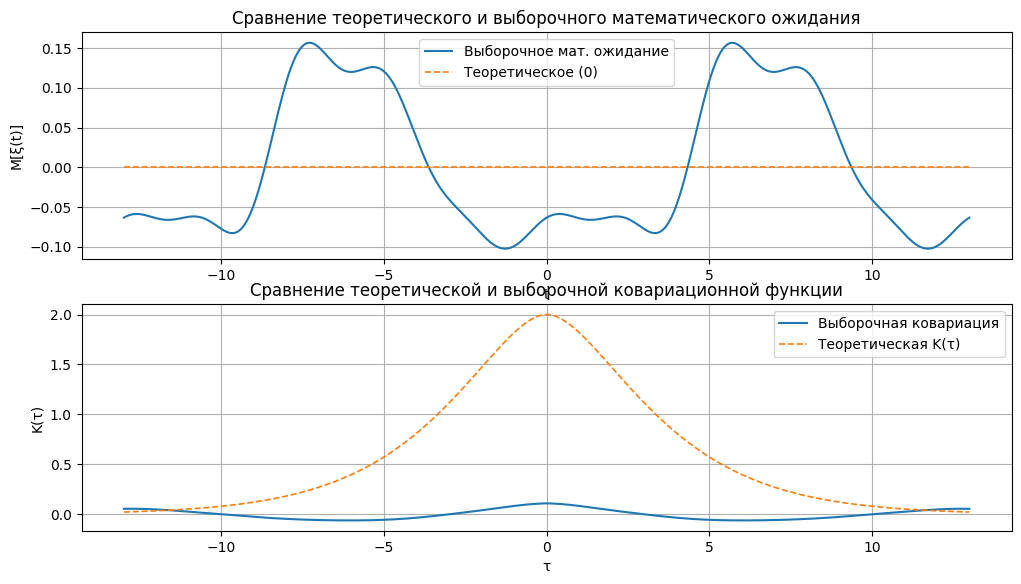

In [ ]:
sample_mean = np.mean(realizations, axis=0)
theoretical_mean = np.zeros_like(t)

maxlag = int(0.5 * len(t))
lags_idx = np.arange(-maxlag, maxlag + 1)
acov = np.zeros_like(lags_idx, dtype=float)

for r in range(n_realizations):
    x = realizations[r] - realizations[r].mean()
    acorr = np.correlate(x, x, mode='full') / len(x)
    center = len(acorr)//2
    acov += acorr[center - maxlag: center + maxlag + 1]
acov /= n_realizations

tau_lags = lags_idx * (t[1] - t[0])

K_theor_lags = K_theoretical(tau_lags)

mean_emp = np.mean(sample_mean)
var_emp = np.var(realizations, ddof=1)
print(f"Выборочное среднее (в среднем по времени) = {mean_emp:.4f}")
plt.figure(figsize=(12, 10))
plt.subplot(3, 1, 1)
plt.plot(t, sample_mean, label='Выборочное мат. ожидание', linewidth=1.5)
plt.plot(t, theoretical_mean, '--', label='Теоретическое (0)', linewidth=1.2)
plt.title('Сравнение теоретического и выборочного математического ожидания')
plt.xlabel('t')
plt.ylabel('M[ξ(t)]')
plt.legend()
plt.grid(True)

plt.subplot(3, 1, 2)
plt.plot(tau_lags, acov, label='Выборочная ковариация', linewidth=1.5)
plt.plot(tau_lags, K_theor_lags, '--', label='Теоретическая K(τ)', linewidth=1.2)
plt.title('Сравнение теоретической и выборочной ковариационной функции')
plt.xlabel('τ')
plt.ylabel('K(τ)')
plt.legend()
plt.grid(True)
plt.show()
